# EROAD GPS Tracking Data Analysis

## Abstract 

EROAD has established an enviable position as a trusted party of their customers and the government agencies they work with in New Zealand and North America. To achieve this EROAD built an entirely new kind of technology platform to support the commercial transport sector – designed from the ground up to meet the highest performance, financial and evidential standards. This project will concentrate on analysing the connection between different types of data, and trying to predict some information based on the given data. Supervised learning techniques of Naive Bayes classification and K-Nearest Neighbors classification and unsupervised leanring techniques of k-means clustering have been implemented in this project.

## Introduction

EROAD is one of the leading GPS tracking solution provider across the country, and EROAD has a very good relationship with New Zealand Goverment. EROAD operating a transport business is a complex and demanding task. EROAD’s solution is designed to make their customers' job easier. It gives clients the opportunity to take control of tax and compliance obligations, support a safety-focused culture, and better manage your business. However, all the datasets were provided by EROAD under the NDA agreement, due to the reason of the commercial confidential and sensitivity. First and foremost, the data would be wrangled, cleaned, and integrated. After all that preparation, this project will use those data to anylyse the GPS tracking information. 

This project will focuse on exploring the following questions: 
 1. Applying the GPS coordinates on Google Map.
 2. Predicting the vehicle weight type based on speed and direction.
 3. Predicting the day of the week based on the speed and direction. 
 4. Predicting the direction based on the speed and time. 
 5. Clustering the vehicles into disticnt groups described as heavy or light vehicle without using "heavy/light" weight type labels
 6. Clustering the vehicles into distinct groups described as north/south bound direction without using "North/South" direction labels

The official Website: http://www.eroad.co.nz/

## Data Wrangling

In [1]:
import os
import glob
import pandas
import numpy

In [2]:
os.chdir("Machine_data")
fileList=glob.glob("*.csv")
dfList=[]
for filename in fileList:
        #print (filename)
        df=pandas.read_csv(filename,sep=";",index_col="id",header=0)
        dfList.append(df)

In [4]:
concatDf=pandas.concat(dfList,axis=0)
concatDf.head()

,event_timestamp,course_over_ground,machine_id,vehicle_weight_type,speed_gps_kph,latitude,longitude
id,,,,,,,
1.464193e+10,2015-11-15 17:46:40,177,10051,HEAVY,3,-36.725578,174.714820
1.464257e+10,2015-11-15 18:12:41,156,10051,HEAVY,13,-36.769465,174.741590
1.464188e+10,2015-11-15 17:44:30,169,10051,HEAVY,0,-36.723136,174.714432
1.464226e+10,2015-11-15 18:00:47,150,10051,HEAVY,17,-36.747435,174.723397
1.464199e+10,2015-11-15 17:49:43,249,10051,HEAVY,6,-36.728260,174.715083


In [5]:
os.getcwd()

'D:\\Jupyter\\Project 3\\Machine_data'

In [6]:
os.chdir("..")

In [7]:
os.getcwd()

'D:\\Jupyter\\Project 3'

In [8]:
concatDf.to_csv("Concatenated_machine_data.csv",index=id)

In [9]:
concatDf.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 569941 entries, 14641931007.0 to 14674771261.0
Data columns (total 7 columns):
event_timestamp        569941 non-null object
course_over_ground     569941 non-null int64
machine_id             569941 non-null int64
vehicle_weight_type    569578 non-null object
speed_gps_kph          569941 non-null int64
latitude               569941 non-null float64
longitude              569941 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 34.8+ MB


## Question 1, Applying the GPS coordinates on Google Map.

In [10]:
!pip install simplekml

The python package simplekml was created to generate kml (or kmz). It was designed to alleviate the burden of having to study KML in order to achieve anything worthwhile with it. We pulled the coordinates from the Northen Motorway Road Segements.CSV to create a file calle Locations.KML, then we import this KML file into Google Map in order to display all the coordinates on the map. 

In [11]:
import simplekml
 
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
  
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use("ggplot")
%matplotlib inline

from __future__ import division

import seaborn as sns
sns.set_style("whitegrid")

#pd.set_option("display.notebook_repr_html",True)
pd.set_option("display.max_columns",15)
pd.set_option("display.max_rows",6)
pd.set_option("display.width",78)
pd.set_option("precision",4)
from pylab import rcParams

sns.set(style="ticks")
rcParams['figure.dpi'] = 350
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'
rcParams['figure.figsize'] = 10,8
rcParams['font.size'] = 15

rcParams['axes.labelsize'] = 'large'
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15

In [94]:
def kml(input="Northern Motorway Road Segments Modified.csv",out="Locations.kml"):
    kml=simplekml.Kml()
    df=pd.read_csv(input,index_col=["id","full_name","Longitute","Latitute"])
    for id,lon,lat in zip(df.index.get_level_values("full_name"),df.index.get_level_values("Longitute"),
                            df.index.get_level_values("Latitute")):
        kml.newpoint(name=id,coords=[(lon,lat)])
        kml.save(out)

In [95]:
os.getcwd()

'D:\\Jupyter\\Project 3'

In [96]:
kml()

In [15]:
from IPython.display import IFrame

In [16]:
def show_web_map(url):       
    return IFrame(url, width='100%', height=500)

In [17]:
show_web_map("https://www.google.com/maps/d/u/0/embed?mid=1Un-dH9_Om41HuJu3zgDNWAeLyxc")

## Question 2, Predicting the readings are for the vehicle weight type based on directions and speed

**Vehicle weight type**:  'LIGHT' or 'HEAVY' classification from NZTA. 'HEAVY' vehicles are those with a gross weight of 3.5 tonnes and over.

### Data Formatting and Data Visualization Analysis

In [18]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
  
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use("ggplot")
%matplotlib inline

from __future__ import division

import seaborn as sns
sns.set_style("whitegrid")

#pd.set_option("display.notebook_repr_html",True)
pd.set_option("display.max_columns",15)
pd.set_option("display.max_rows",6)
pd.set_option("display.width",78)
pd.set_option("precision",4)
from pylab import rcParams

sns.set(style="ticks")
rcParams['figure.dpi'] = 350
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'
rcParams['figure.figsize'] = 10,8
rcParams['font.size'] = 15

rcParams['axes.labelsize'] = 'large'
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15

In [19]:
#from ftplib import FTP, error_perm
import os
import glob
#import pandas as pd
#import numpy as np
#import patoolib
import seaborn as sns
import simplekml
from IPython.display import Image

import math 
from sklearn import preprocessing
from sklearn import neighbors

#import matplotlib as mtpl
import math
import random

In [3]:
df_machine_data = pd.read_csv("Concatenated_machine_data.csv")
#df=pandas.read_csv(filename,sep=";",index_col="id",header=0)

In [4]:
df_machine_data.head()

,id,event_timestamp,course_over_ground,machine_id,vehicle_weight_type,speed_gps_kph,latitude,longitude
0,1.4642e+10,2015-11-15 17:46:40,177,10051,HEAVY,3,-36.7256,174.7148
1,1.4643e+10,2015-11-15 18:12:41,156,10051,HEAVY,13,-36.7695,174.7416
2,1.4642e+10,2015-11-15 17:44:30,169,10051,HEAVY,0,-36.7231,174.7144
3,1.4642e+10,2015-11-15 18:00:47,150,10051,HEAVY,17,-36.7474,174.7234
4,1.4642e+10,2015-11-15 17:49:43,249,10051,HEAVY,6,-36.7283,174.7151


In [5]:
df= df_machine_data.dropna()

In [6]:
df.vehicle_weight_type.unique()

array(['HEAVY', 'LIGHT'], dtype=object)

In [7]:
df.dtypes

id                    float64
event_timestamp        object
course_over_ground      int64
                       ...   
speed_gps_kph           int64
latitude              float64
longitude             float64
dtype: object

In [8]:
df[[2,5,4]]

,course_over_ground,speed_gps_kph,vehicle_weight_type
0,177,3,HEAVY
1,156,13,HEAVY
2,169,0,HEAVY
...,...,...,...
569938,28,60,HEAVY
569939,332,86,HEAVY
569940,164,77,HEAVY


In classification problems, the **ability to separate classes** from one another is the most important consideration.

Let's do some quick visualizations of the data. We can actually do a very broad and quick birds eye view with seaborn's pairplot.

## Question 3, Predicting the day of the week based on the speed and direction.

Values in event_timestamp column will be converted to datetime type and then delete time from the value. In order to easy analyse, all the date will be converted to the day of the week. 

In [20]:
rcParams['figure.figsize'] = 15, 10
%matplotlib inline

In [21]:
ts_data = pd.read_csv('Concatenated_machine_data_Modified.csv')
ts_data.head()

,id,event_timestamp,course_over_ground,machine_id,vehicle_weight_type,speed_gps_kph,latitude,longitude
0,14641931007,15/11/15 17:46,177,10051,HEAVY,3,-36.7256,174.7148
1,14642568129,15/11/15 18:12,156,10051,HEAVY,13,-36.7695,174.7416
2,14641876524,15/11/15 17:44,169,10051,HEAVY,0,-36.7231,174.7144
3,14642262476,15/11/15 18:00,150,10051,HEAVY,17,-36.7474,174.7234
4,14641991113,15/11/15 17:49,249,10051,HEAVY,6,-36.7283,174.7151


In [22]:
ts_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569941 entries, 0 to 569940
Data columns (total 8 columns):
id                     569941 non-null int64
event_timestamp        569941 non-null object
course_over_ground     569941 non-null int64
machine_id             569941 non-null int64
vehicle_weight_type    569578 non-null object
speed_gps_kph          569941 non-null int64
latitude               569941 non-null float64
longitude              569941 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 34.8+ MB


In [23]:
ts_data['event_timestamp'] = pd.to_datetime(ts_data['event_timestamp'], format='%d/%m/%y %H:%M').dt.date
ts_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569941 entries, 0 to 569940
Data columns (total 8 columns):
id                     569941 non-null int64
event_timestamp        569941 non-null object
course_over_ground     569941 non-null int64
machine_id             569941 non-null int64
vehicle_weight_type    569578 non-null object
speed_gps_kph          569941 non-null int64
latitude               569941 non-null float64
longitude              569941 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 34.8+ MB


In [24]:
print ts_data.info()
ts_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569941 entries, 0 to 569940
Data columns (total 8 columns):
id                     569941 non-null int64
event_timestamp        569941 non-null object
course_over_ground     569941 non-null int64
machine_id             569941 non-null int64
vehicle_weight_type    569578 non-null object
speed_gps_kph          569941 non-null int64
latitude               569941 non-null float64
longitude              569941 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 34.8+ MB
None


,id,event_timestamp,course_over_ground,machine_id,vehicle_weight_type,speed_gps_kph,latitude,longitude
0,14641931007,2015-11-15,177,10051,HEAVY,3,-36.7256,174.7148
1,14642568129,2015-11-15,156,10051,HEAVY,13,-36.7695,174.7416
2,14641876524,2015-11-15,169,10051,HEAVY,0,-36.7231,174.7144
3,14642262476,2015-11-15,150,10051,HEAVY,17,-36.7474,174.7234
4,14641991113,2015-11-15,249,10051,HEAVY,6,-36.7283,174.7151


In [25]:
ts_data['event_timestamp'].replace(ts_data['event_timestamp'][0],'Sunday',inplace=True)
ts_data['event_timestamp'].replace(ts_data['event_timestamp'][569912],'Monday',inplace=True)
ts_data['event_timestamp'].replace(ts_data['event_timestamp'][569932],'Tuesday',inplace=True)
ts_data['event_timestamp'].replace(ts_data['event_timestamp'][569916],'Wednesday',inplace=True)
ts_data['event_timestamp'].replace(ts_data['event_timestamp'][569919],'Thursday',inplace=True)
ts_data['event_timestamp'].replace(ts_data['event_timestamp'][9991],'Friday',inplace=True)
ts_data

,id,event_timestamp,course_over_ground,machine_id,vehicle_weight_type,speed_gps_kph,latitude,longitude
0,14641931007,Sunday,177,10051,HEAVY,3,-36.7256,174.7148
1,14642568129,Sunday,156,10051,HEAVY,13,-36.7695,174.7416
2,14641876524,Sunday,169,10051,HEAVY,0,-36.7231,174.7144
...,...,...,...,...,...,...,...,...
569938,14691746432,Tuesday,28,9850,HEAVY,60,-36.8293,174.7465
569939,14658983495,Monday,332,9850,HEAVY,86,-36.7344,174.7172
569940,14674771261,Monday,164,9850,HEAVY,77,-36.7213,174.7139


In [26]:
ts_data[[1,5,2]]

,event_timestamp,speed_gps_kph,course_over_ground
0,Sunday,3,177
1,Sunday,13,156
2,Sunday,0,169
...,...,...,...
569938,Tuesday,60,28
569939,Monday,86,332
569940,Monday,77,164


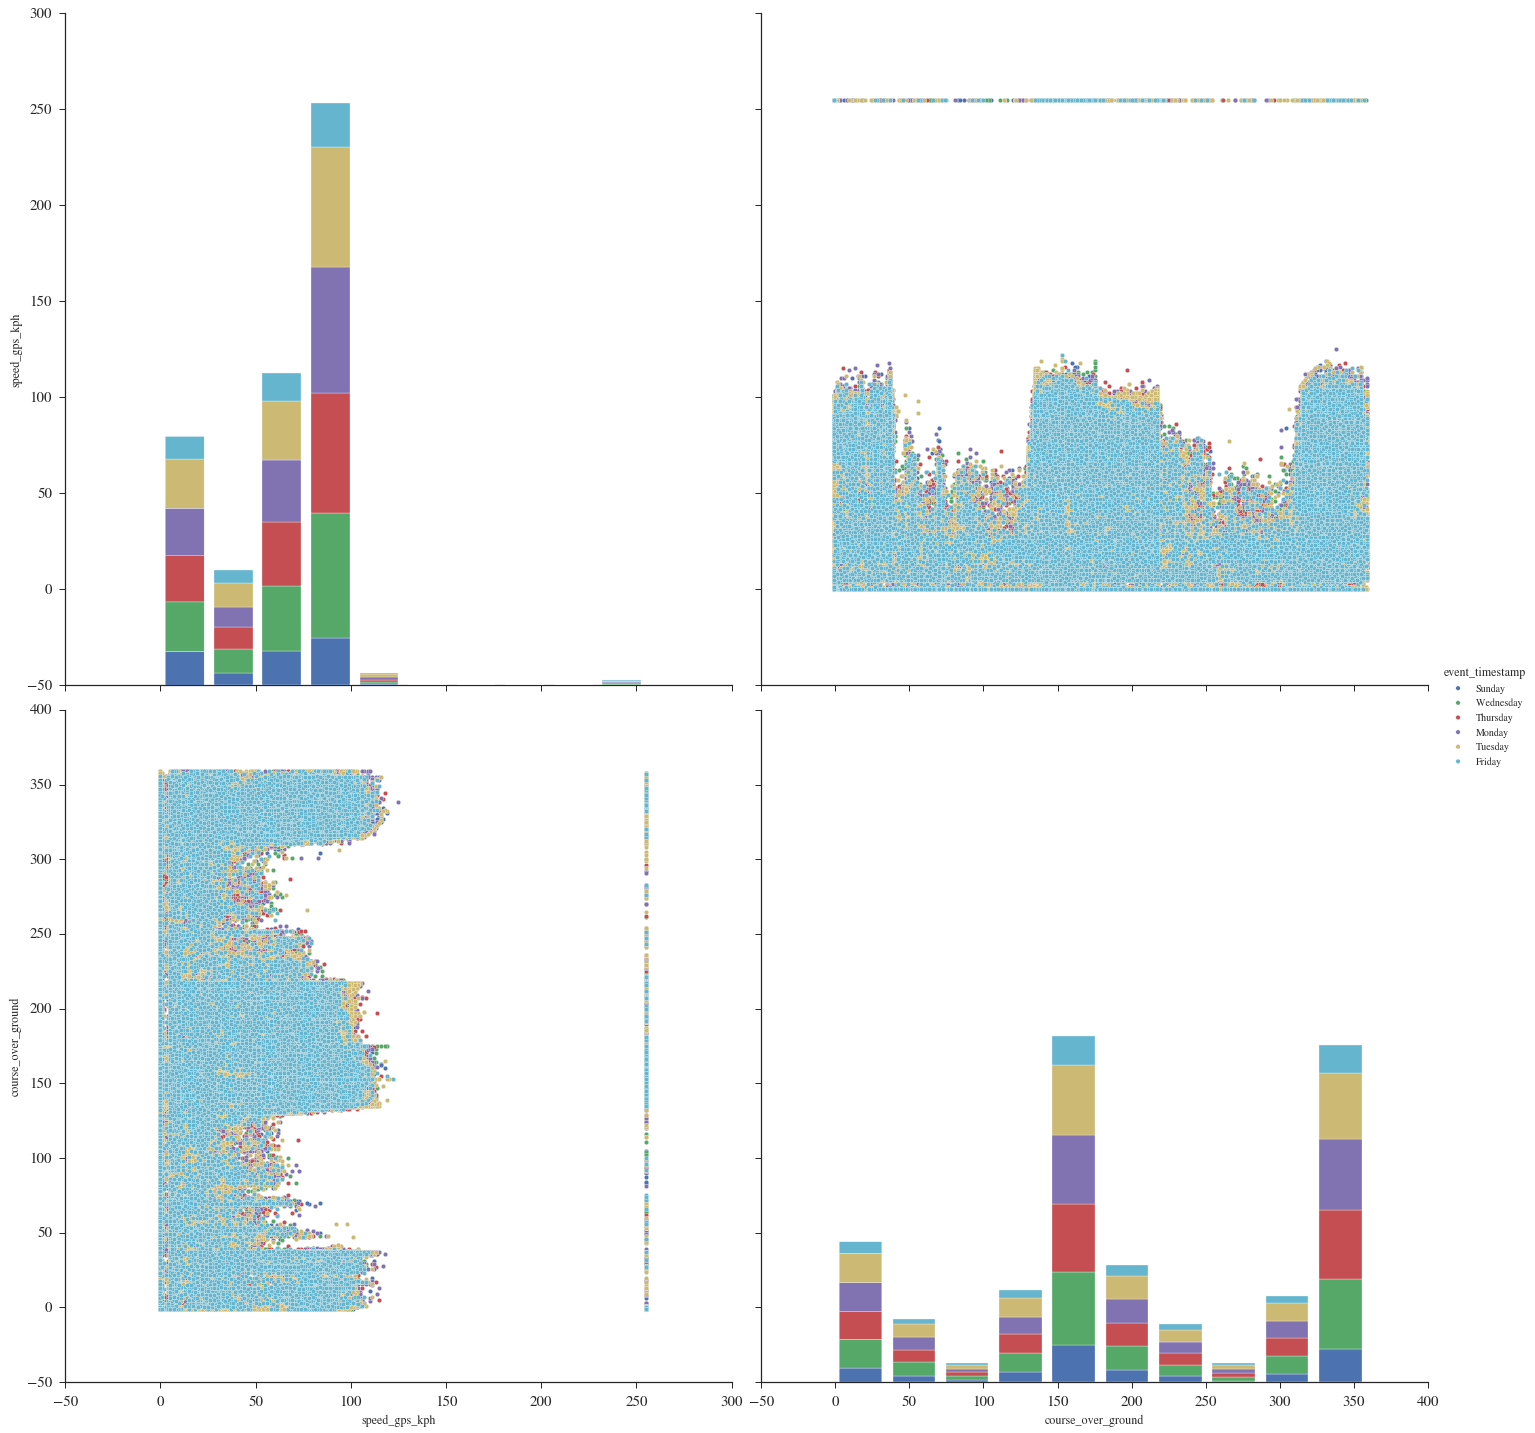

In [27]:
# First a pairplot of all the different features
sns.pairplot(ts_data[[1,5,2]],hue='event_timestamp',size=10)

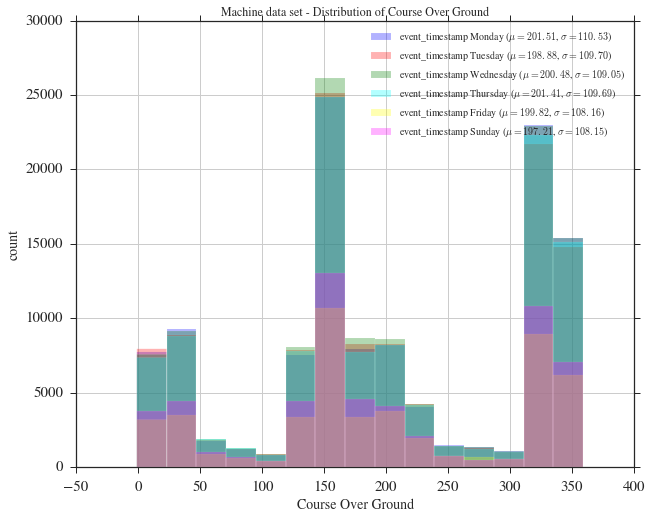

In [28]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10,8))

colors = ('blue','red','green','cyan','yellow','magenta')

for label,color in zip(['Monday', 'Tuesday','Wednesday','Thursday','Friday','Sunday'], colors):
    mean = np.mean(ts_data['course_over_ground'][ts_data['event_timestamp'] == label]) # class sample mean
    stdev = np.std(ts_data['course_over_ground'][ts_data['event_timestamp'] == label]) # class standard deviation
    ts_data['course_over_ground'][ts_data['event_timestamp'] == label].hist(alpha=0.3, # opacity level
             label='event_timestamp {} ($\mu={:.2f}$, $\sigma={:.2f}$)'.format(label, mean, stdev), 
             color=color,
             bins=15)

plt.title('Machine data set - Distribution of Course Over Ground')
plt.xlabel('Course Over Ground', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.legend(loc='upper right')

plt.show()

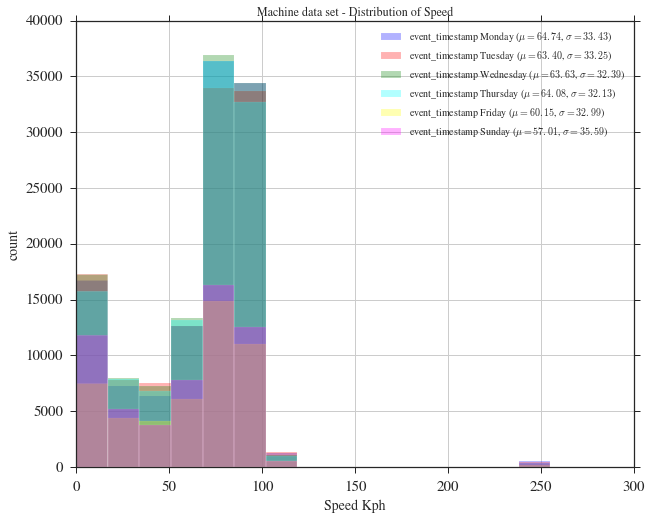

In [29]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10,8))

colors = ('blue','red','green','cyan','yellow','magenta')

for label,color in zip(['Monday', 'Tuesday','Wednesday','Thursday','Friday','Sunday'], colors):
    mean = np.mean(ts_data['speed_gps_kph'][ts_data['event_timestamp'] == label]) # class sample mean
    stdev = np.std(ts_data['speed_gps_kph'][ts_data['event_timestamp'] == label]) # class standard deviation
    ts_data['speed_gps_kph'][ts_data['event_timestamp'] == label].hist(alpha=0.3, # opacity level
             label='event_timestamp {} ($\mu={:.2f}$, $\sigma={:.2f}$)'.format(label, mean, stdev), 
             color=color,
             bins=15)

plt.title('Machine data set - Distribution of Speed')
plt.xlabel('Speed Kph', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.legend(loc='upper right')

plt.show()

## Classifier - Naive Bayes

Because these attributes of course over ground and speed are independant shown in figures above, we can predict the day of the week based on these two features


## Step1 - Splitting the existing data set into a training set and a test set.
If we want to split the dataset into a training and test set with the test set comprising 20% is the dataset, we do as follows:

In [30]:
# split into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ts_data[['course_over_ground','speed_gps_kph']], 
                                                    ts_data['event_timestamp'], random_state=1, test_size=0.2)
print X_train.shape
print X_test.shape

print y_train.shape
print y_test.shape

(455952, 2)
(113989, 2)
(455952L,)
(113989L,)


## Step2 - In the training phase, we present each instance from the training set to the classification algorithm.¶


We can train a Naive Bayes classifier on all our training data as follows:

In [31]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [32]:
classifier = nb.fit(X_train, y_train)
classifier

GaussianNB()

## Step3 - Comparing the class label produced by the algorithm to the true class label of the record in question.

Since we have traind Naive Bayes classifier on all our training data above, we can now use the model for prediction on the training data set:

In [33]:
y_pred_train = classifier.predict(X_train)
y_pred_train

array(['Wednesday', 'Tuesday', 'Wednesday', ..., 'Wednesday', 'Wednesday',
       'Wednesday'], 
      dtype='|S9')

We can find out how well our classifier learned the training dataset based on overall accuracy:

In [34]:
classifier.score(X_train, y_train)

0.20980497947152332

We can generate a more comprehensive accuracy report:

In [35]:
from sklearn import metrics
print metrics.classification_report(y_train, y_pred_train)

             precision    recall  f1-score   support

     Friday       0.00      0.00      0.00     38959
     Monday       0.23      0.10      0.14     92327
     Sunday       0.14      0.00      0.01     46606
   Thursday       0.00      0.00      0.00     91286
    Tuesday       0.20      0.17      0.18     91926
  Wednesday       0.21      0.75      0.33     94848

avg / total       0.14      0.21      0.13    455952



D:\Program Files\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Step4 - If possible, then we adjust the algorithm's “parameters” to achieve the greatest possible accuracy or, equivalently, the lowest possible error rate.

Not strongly necessary in this classifier.

## Step5 - The results can be summarized in a so-called confusion matrix whose entries are the number of records in each category.

Let's see what the confusion matrix looks like:

In [36]:
print metrics.confusion_matrix(y_train, y_pred_train)

[[    0  2489   122     0  6853 29495]
 [    0  9431   307     0 14622 67967]
 [    0  3959   199     0 10620 31828]
 [    0  7531   233     0 13915 69607]
 [    0  9220   291     0 15354 67061]
 [    0  8710   262     0 15199 70677]]


## Step6 - After we have optimized the algorithm using only the training data, we let the classifier operate on the elements of the test set to see how well it classifies them.

We can now test this classifier on the unseen dataset (test dataset):

In [37]:
y_pred_test = classifier.predict(X_test)
y_pred_test

array(['Wednesday', 'Wednesday', 'Wednesday', ..., 'Wednesday',
       'Wednesday', 'Wednesday'], 
      dtype='|S9')

We can find out how well our classifier predicted the test dataset based on overall accuracy:


In [38]:
classifier.score(X_test, y_test)

0.21052031336357016

We can generate a more comprehensive accuracy report:


In [39]:
from sklearn import metrics
print metrics.classification_report(y_test, y_pred_test)

             precision    recall  f1-score   support

     Friday       0.00      0.00      0.00      9784
     Monday       0.23      0.10      0.14     23282
     Sunday       0.15      0.00      0.01     11589
   Thursday       0.00      0.00      0.00     22816
    Tuesday       0.20      0.17      0.18     22786
  Wednesday       0.21      0.75      0.33     23732

avg / total       0.15      0.21      0.13    113989



Let's see what the confusion matrix looks like:


In [40]:
print metrics.confusion_matrix(y_test, y_pred_test)

[[    0   638    30     0  1644  7472]
 [    0  2353    85     0  3672 17172]
 [    0   985    55     0  2627  7922]
 [    0  1851    63     0  3463 17439]
 [    0  2294    69     0  3782 16641]
 [    0  2097    53     0  3775 17807]]


## Step7 - Using different number of folds to test the accuracy of the generalization of your classifiers¶


If we would prefer to use stratified cross-fold validations, then:


In [41]:
from sklearn.cross_validation import cross_val_score
classifierNB = GaussianNB()
scores = cross_val_score(classifierNB, X_test, y_test, cv=5, scoring='accuracy')
scores

array([ 0.21073637,  0.21053555,  0.20963285,  0.21086108,  0.21215179])

The code above uses 5 folds and uses accuracy for a general evaluation metric. The returned result is accuracy for each of the folds.
We can find the mean and standard deviation of all the results:

In [42]:
print 'when k = 5, mean is: ', scores.mean()
print 'when k = 5, STD is: ', scores.std()

when k = 5, mean is:  0.210783526666
when k = 5, STD is:  0.000808199677981


Since in the stratified k-fold cross validation, the k value usually ranges from 5 - 10. Now Let's uses 10 folds (maxium folds) to test the accuracy of the generalization of Naive classifiers to see whether enhanced or not.

In [43]:
scores = cross_val_score(classifierNB, X_test, y_test, cv=10, scoring='accuracy')
scores

array([ 0.20829679,  0.21583933,  0.21122807,  0.20982456,  0.20738661,
        0.2135275 ,  0.20689655,  0.2138282 ,  0.21189787,  0.21437346])

We can find the mean and standard deviation of all the results:


In [44]:
print 'when k = 10, mean is: ', scores.mean()
print 'when k = 10, STD is: ', scores.std()

when k = 10, mean is:  0.211309894768
when k = 10, STD is:  0.00296087854488


We can see from the result that **more folds in stratified cross validation did not improve the performance of the generalization of Naive Bayes classifier.**

**Step8 - Experimenting with using different combinations of features and observe if the accuracy increases/decreases as we omit some of the**
m
In the future research of richer EROAD dataset, **feature selection** methodology could be implemented in this question.

## Question 3, Predicting the direction based on the speed and time.

Values in course_over_ground will be converted to two directions which are North and South. 

In [45]:
timeOnly_data = pd.read_csv('Concatenated_machine_data_Modified.csv')
timeOnly_data.head()

,id,event_timestamp,course_over_ground,machine_id,vehicle_weight_type,speed_gps_kph,latitude,longitude
0,14641931007,15/11/15 17:46,177,10051,HEAVY,3,-36.7256,174.7148
1,14642568129,15/11/15 18:12,156,10051,HEAVY,13,-36.7695,174.7416
2,14641876524,15/11/15 17:44,169,10051,HEAVY,0,-36.7231,174.7144
3,14642262476,15/11/15 18:00,150,10051,HEAVY,17,-36.7474,174.7234
4,14641991113,15/11/15 17:49,249,10051,HEAVY,6,-36.7283,174.7151


In [46]:
timeOnly_data['event_timestamp'] = pd.to_datetime(timeOnly_data['event_timestamp'], format='%d/%m/%y %H:%M').dt.strftime('%H')
timeOnly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569941 entries, 0 to 569940
Data columns (total 8 columns):
id                     569941 non-null int64
event_timestamp        569941 non-null object
course_over_ground     569941 non-null int64
machine_id             569941 non-null int64
vehicle_weight_type    569578 non-null object
speed_gps_kph          569941 non-null int64
latitude               569941 non-null float64
longitude              569941 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 34.8+ MB


In [47]:
timeOnly_data.head()

,id,event_timestamp,course_over_ground,machine_id,vehicle_weight_type,speed_gps_kph,latitude,longitude
0,14641931007,17,177,10051,HEAVY,3,-36.7256,174.7148
1,14642568129,18,156,10051,HEAVY,13,-36.7695,174.7416
2,14641876524,17,169,10051,HEAVY,0,-36.7231,174.7144
3,14642262476,18,150,10051,HEAVY,17,-36.7474,174.7234
4,14641991113,17,249,10051,HEAVY,6,-36.7283,174.7151


In [48]:
timeOnly_data['event_timestamp'] = timeOnly_data[['event_timestamp']].apply(pd.to_numeric, errors='coerce')
timeOnly_data.event_timestamp.unique()

array([17, 18,  0, 16, 21, 20, 19, 22,  3, 13,  1, 23,  2, 15,  8,  5,  6,
        9, 10, 11,  4,  7, 14, 12], dtype=int64)

In [49]:
def course_over_ground(x):
    if ((x>=-1 and x<=90)or(x>=270 and x<=360)):
        return 'North'
    else: return 'South'

In [50]:
timeOnly_data['course_over_ground'] = timeOnly_data[['course_over_ground']].applymap(course_over_ground)
timeOnly_data

,id,event_timestamp,course_over_ground,machine_id,vehicle_weight_type,speed_gps_kph,latitude,longitude
0,14641931007,17,South,10051,HEAVY,3,-36.7256,174.7148
1,14642568129,18,South,10051,HEAVY,13,-36.7695,174.7416
2,14641876524,17,South,10051,HEAVY,0,-36.7231,174.7144
...,...,...,...,...,...,...,...,...
569938,14691746432,5,North,9850,HEAVY,60,-36.8293,174.7465
569939,14658983495,2,North,9850,HEAVY,86,-36.7344,174.7172
569940,14674771261,20,South,9850,HEAVY,77,-36.7213,174.7139


In [51]:
timeOnly_data[[1,2,5]]

,event_timestamp,course_over_ground,speed_gps_kph
0,17,South,3
1,18,South,13
2,17,South,0
...,...,...,...
569938,5,North,60
569939,2,North,86
569940,20,South,77


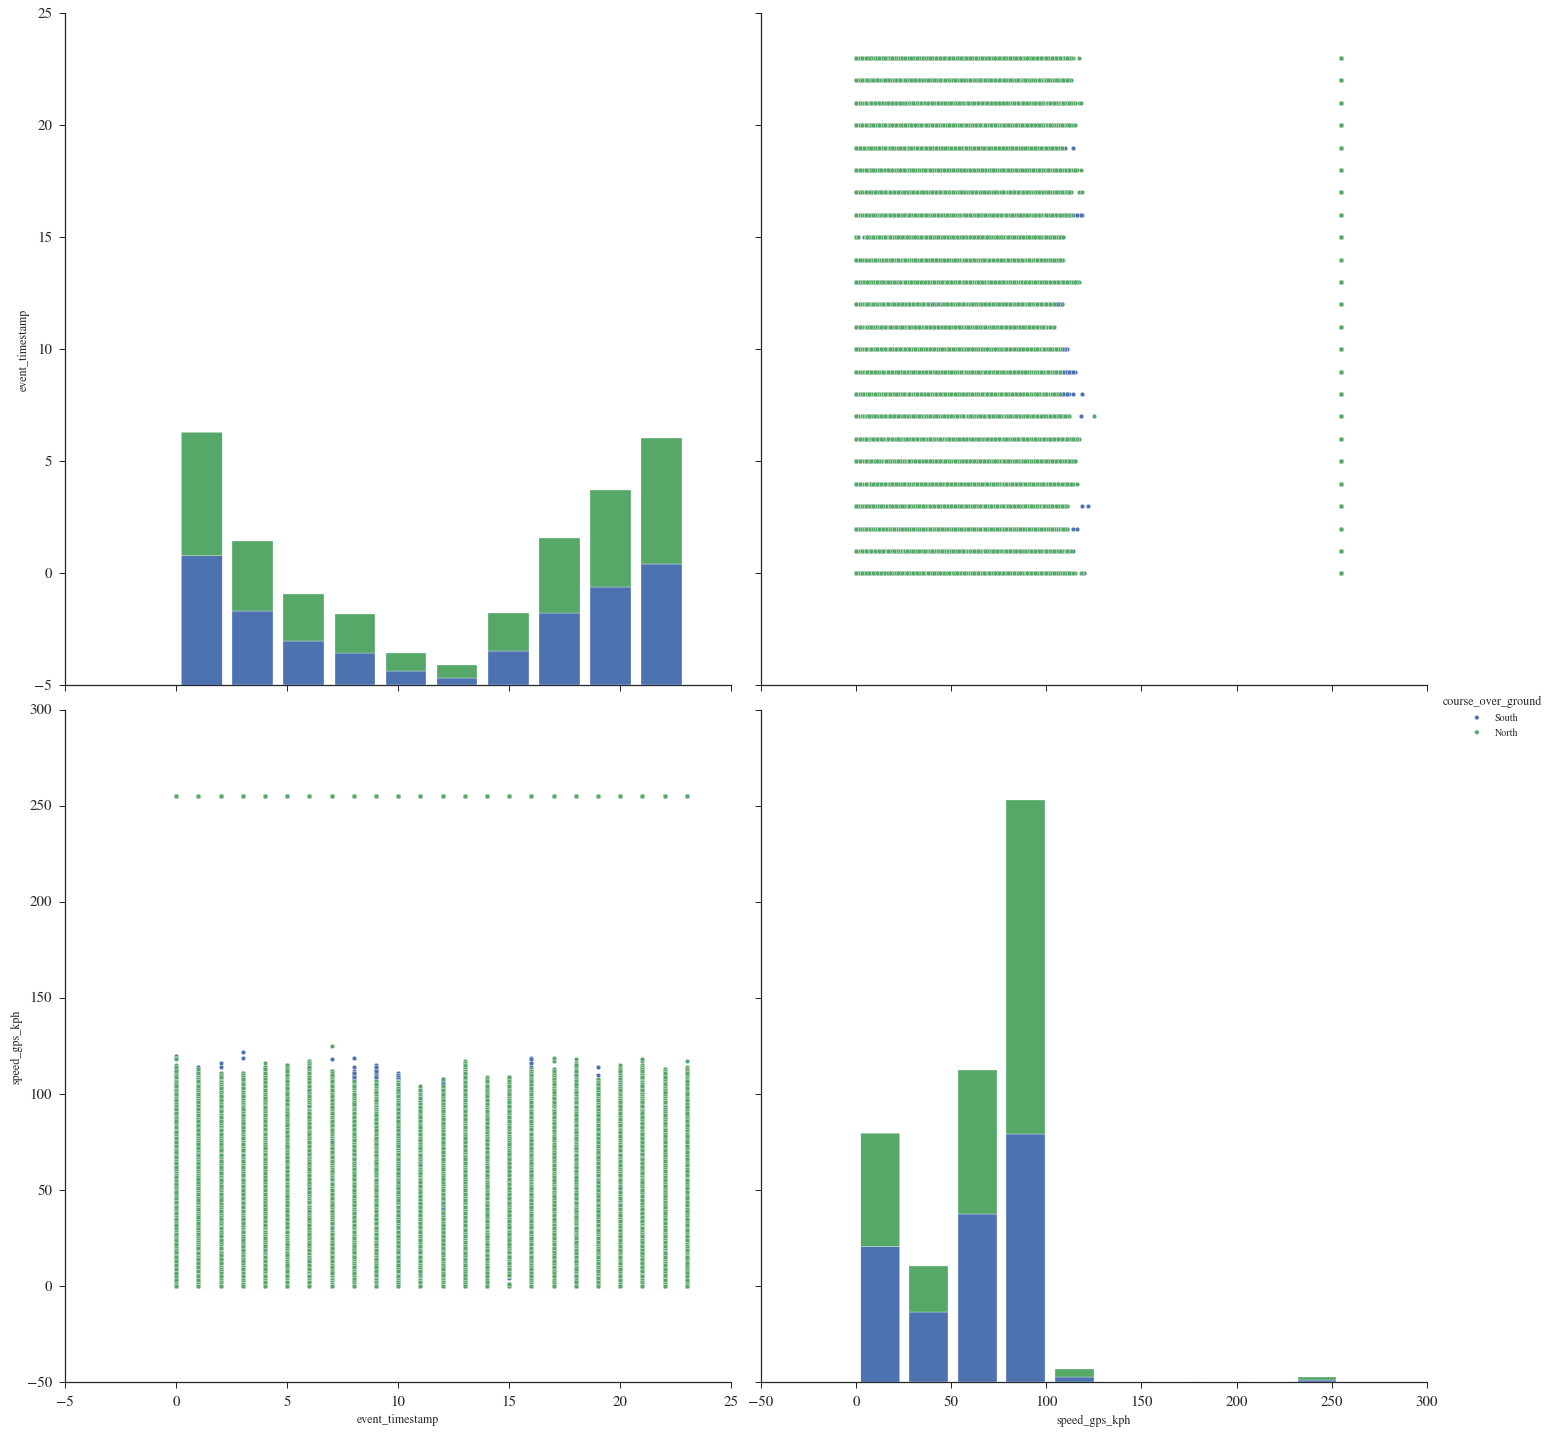

In [52]:
# First a pairplot of all the different features
sns.pairplot(timeOnly_data[[1,2,5]],hue='course_over_ground',size=10)

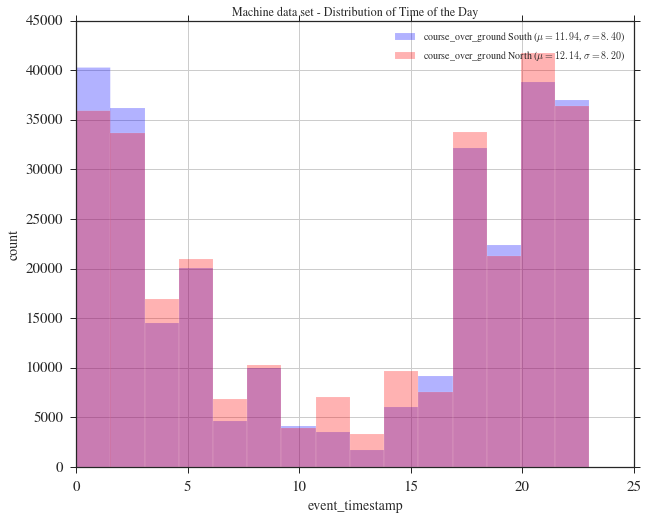

In [53]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10,8))

colors = ('blue','red')

for label,color in zip(['South','North'], colors):
    mean = np.mean(timeOnly_data['event_timestamp'][timeOnly_data['course_over_ground'] == label]) # class sample mean
    stdev = np.std(timeOnly_data['event_timestamp'][timeOnly_data['course_over_ground'] == label]) # class standard deviation
    timeOnly_data['event_timestamp'][timeOnly_data['course_over_ground'] == label].hist(alpha=0.3, # opacity level
             label='course_over_ground {} ($\mu={:.2f}$, $\sigma={:.2f}$)'.format(label, mean, stdev), 
             color=color,
             bins=15)

plt.title('Machine data set - Distribution of Time of the Day')
plt.xlabel('event_timestamp', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.legend(loc='upper right')

plt.show()

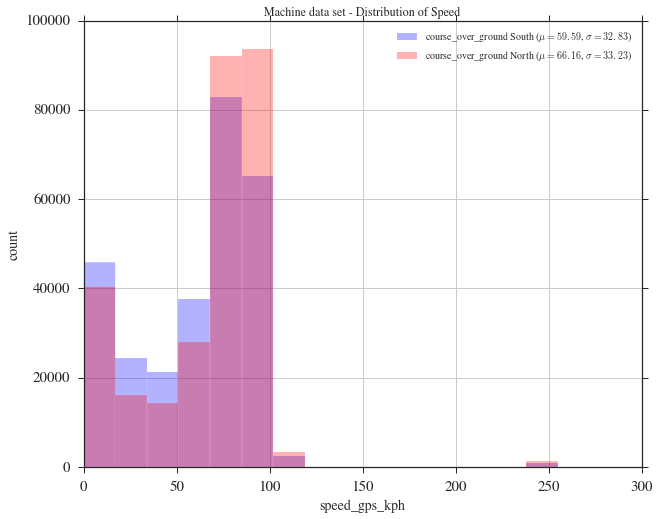

In [54]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10,8))

colors = ('blue','red')

for label,color in zip(['South','North'], colors):
    mean = np.mean(timeOnly_data['speed_gps_kph'][timeOnly_data['course_over_ground'] == label]) # class sample mean
    stdev = np.std(timeOnly_data['speed_gps_kph'][timeOnly_data['course_over_ground'] == label]) # class standard deviation
    timeOnly_data['speed_gps_kph'][timeOnly_data['course_over_ground'] == label].hist(alpha=0.3, # opacity level
             label='course_over_ground {} ($\mu={:.2f}$, $\sigma={:.2f}$)'.format(label, mean, stdev), 
             color=color,
             bins=15)

plt.title('Machine data set - Distribution of Speed')
plt.xlabel('speed_gps_kph', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.legend(loc='upper right')

plt.show()

In [55]:
# split into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(timeOnly_data[['event_timestamp','speed_gps_kph']], 
                                                    timeOnly_data['course_over_ground'], random_state=1, test_size=0.2)
print X_train.shape
print X_test.shape

print y_train.shape
print y_test.shape

(455952, 2)
(113989, 2)
(455952L,)
(113989L,)


In [56]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [57]:
classifier = nb.fit(X_train, y_train)

In [58]:
y_pred_train = classifier.predict(X_train)
y_pred_train

array(['South', 'South', 'North', ..., 'South', 'North', 'North'], 
      dtype='|S5')

In [59]:
classifier.score(X_train, y_train)

0.55236296803172269

In [60]:
from sklearn import metrics
print metrics.classification_report(y_train, y_pred_train)

             precision    recall  f1-score   support

      North       0.55      0.70      0.62    231618
      South       0.56      0.40      0.47    224334

avg / total       0.56      0.55      0.54    455952



In [61]:
print metrics.confusion_matrix(y_train, y_pred_train)

[[163126  68492]
 [135609  88725]]


In [62]:
y_pred_test = classifier.predict(X_test)
y_pred_test

array(['North', 'South', 'North', ..., 'North', 'North', 'South'], 
      dtype='|S5')

In [63]:
classifier.score(X_test, y_test)

0.55096544403407344

In [64]:
from sklearn import metrics
print metrics.classification_report(y_test, y_pred_test)

             precision    recall  f1-score   support

      North       0.54      0.71      0.61     57787
      South       0.56      0.39      0.46     56202

avg / total       0.55      0.55      0.54    113989



In [65]:
print metrics.confusion_matrix(y_test, y_pred_test)

[[40748 17039]
 [34146 22056]]


In [66]:
from sklearn.cross_validation import cross_val_score
classifierNB = GaussianNB()
scores = cross_val_score(classifierNB, X_test, y_test, cv=5, scoring='accuracy')
scores

array([ 0.54941006,  0.55340146,  0.54691407,  0.55147607,  0.54906347])

In [67]:
print 'when k = 5, mean is: ', scores.mean()
print 'when k = 5, STD is: ', scores.std()

when k = 5, mean is:  0.550053027828
when k = 5, STD is:  0.00221281625679


In [68]:
scores = cross_val_score(classifierNB, X_test, y_test, cv=10, scoring='accuracy')
scores

array([ 0.54964912,  0.54921053,  0.5502237 ,  0.55732959,  0.54408281,
        0.54960961,  0.55110097,  0.55079839,  0.54948237,  0.54781541])

In [69]:
print 'when k = 10, mean is: ', scores.mean()
print 'when k = 10, STD is: ', scores.std()

when k = 10, mean is:  0.549930250342
when k = 10, STD is:  0.00310686525171


## Question 5, Clustering the vehicles into disticnt groups described as heavy or light vehicle without using "heavy/light" weight type labels

In [4]:
df_machine_data = pd.read_csv("Concatenated_machine_data.csv")
#df=pandas.read_csv(filename,sep=";",index_col="id",header=0)

In [5]:
df= df_machine_data.dropna()

In [6]:
df_cluster_1 = df[[2,5,4]]
df_cluster_1

,course_over_ground,speed_gps_kph,vehicle_weight_type
0,177,3,HEAVY
1,156,13,HEAVY
2,169,0,HEAVY
...,...,...,...
569938,28,60,HEAVY
569939,332,86,HEAVY
569940,164,77,HEAVY


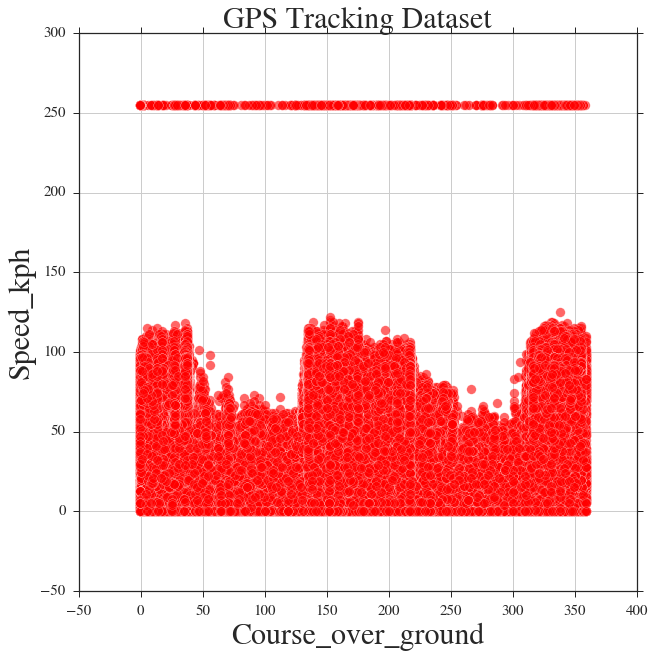

In [7]:
fig, axes = plt.subplots()
fig.set_size_inches(10,10)

axes.grid()
axes.set_xlabel('Course_over_ground',fontsize=30)
axes.set_ylabel('Speed_kph',fontsize=30)
plt.title('GPS Tracking Dataset',fontsize=30)
axes.scatter(df_cluster_1.course_over_ground, df_cluster_1.speed_gps_kph, s=90, alpha=0.6, c='red')

We first need to normalise the data:

In [8]:
minmax_scale = preprocessing.MinMaxScaler().fit(df_cluster_1[['course_over_ground','speed_gps_kph']])
df_cluster_1[['course_over_ground','speed_gps_kph']] = minmax_scale.transform(df_cluster_1[['course_over_ground','speed_gps_kph']])

D:\Program Files\Anaconda\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
D:\Program Files\Anaconda\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


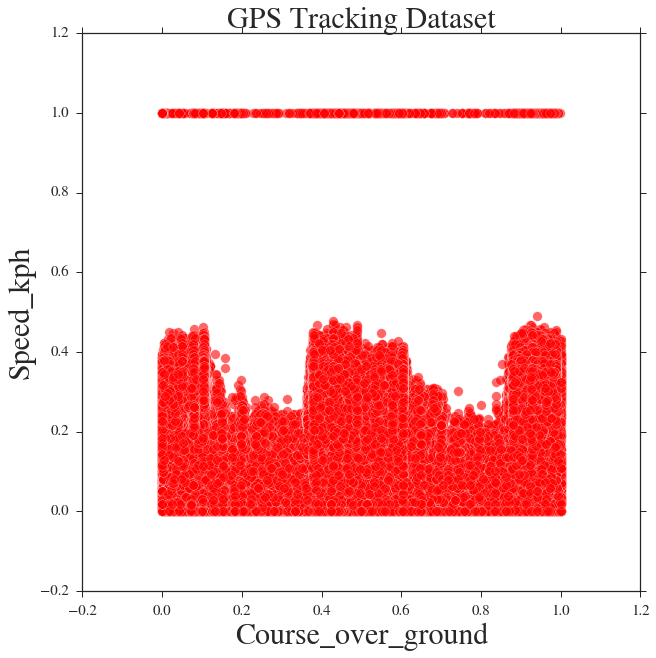

In [9]:
fig, axes = plt.subplots()
fig.set_size_inches(10,10)
axes.set_xlabel('Course_over_ground',fontsize=30)
axes.set_ylabel('Speed_kph',fontsize=30)
plt.title('GPS Tracking Dataset',fontsize=30)
axes.scatter(df_cluster_1.course_over_ground, df_cluster_1.speed_gps_kph, s=90, alpha=0.6, c='red')

Now let's use k-means algorithms to cluster the vehicles into distinct groups with **k=2 (2 natural groups of data)** as a starting point.

In [10]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [11]:
km = KMeans(n_clusters=2, init='random')

In [12]:
df_cluster_1.head()

,course_over_ground,speed_gps_kph,vehicle_weight_type
0,0.4944,0.0118,HEAVY
1,0.4361,0.0510,HEAVY
2,0.4722,0.0000,HEAVY
3,0.4194,0.0667,HEAVY
4,0.6944,0.0235,HEAVY


In [13]:
df_cluster_1.tail()

,course_over_ground,speed_gps_kph,vehicle_weight_type
569936,0.3972,0.2627,HEAVY
569937,0.5833,0.2902,HEAVY
569938,0.0806,0.2353,HEAVY
569939,0.9250,0.3373,HEAVY
569940,0.4583,0.3020,HEAVY


In [14]:
km.fit(df_cluster_1[['course_over_ground','speed_gps_kph']].values)

KMeans(copy_x=True, init='random', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [15]:
predictions = km.predict(df_cluster_1[['course_over_ground','speed_gps_kph']].values)
predictions

array([0, 0, 0, ..., 0, 1, 0])

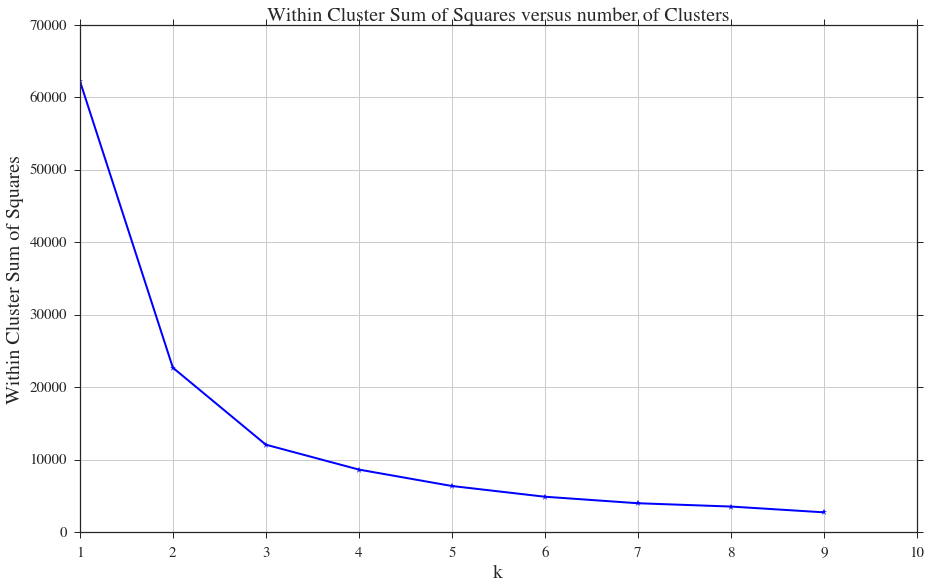

In [17]:
k_rng = range(1,10)
est = [KMeans(n_clusters = k).fit(df_cluster_1[['course_over_ground','speed_gps_kph']].values) for k in k_rng]

# Generally want to minimize WSS, while also minimizing k
within_cluster_sum_squares = [e.inertia_ for e in est]
fig, axes = plt.subplots()
fig.set_size_inches(15,20)
# Plot the results
plt.subplot(212)
plt.plot(k_rng, within_cluster_sum_squares, 'b*-')
plt.xlim([1,10])
plt.grid(True)
plt.xlabel('k', fontsize=20)
plt.ylabel('Within Cluster Sum of Squares', fontsize=20)
plt.title('Within Cluster Sum of Squares versus number of Clusters', fontsize=20)

We generally want to minimize WSS, while also minimizing k. The elbow area on the curve which shows k = 2 as 2 numbers of clusters indicates that **we can cluster the vehicles into 2 disticnt groups most accurately among other number of groups from 1 to 9**. And 2 natural groups of vehicles might be described as heavy or light vehicle according to cluster analysis. 

## Question 6, Clustering the vehicles into distinct groups described as north/south bound direction without using "North/South" direction labels

In [70]:
timeOnly_data = pd.read_csv('Concatenated_machine_data_Modified.csv')
timeOnly_data.head()

,id,event_timestamp,course_over_ground,machine_id,vehicle_weight_type,speed_gps_kph,latitude,longitude
0,14641931007,15/11/15 17:46,177,10051,HEAVY,3,-36.7256,174.7148
1,14642568129,15/11/15 18:12,156,10051,HEAVY,13,-36.7695,174.7416
2,14641876524,15/11/15 17:44,169,10051,HEAVY,0,-36.7231,174.7144
3,14642262476,15/11/15 18:00,150,10051,HEAVY,17,-36.7474,174.7234
4,14641991113,15/11/15 17:49,249,10051,HEAVY,6,-36.7283,174.7151


In [71]:
timeOnly_data['event_timestamp'] = pd.to_datetime(timeOnly_data['event_timestamp'], format='%d/%m/%y %H:%M').dt.strftime('%H')

In [72]:
timeOnly_data['event_timestamp'] = timeOnly_data[['event_timestamp']].apply(pd.to_numeric, errors='coerce')

In [73]:
def course_over_ground(x):
    if ((x>=-1 and x<=90)or(x>=270 and x<=360)):
        return 'North'
    else: return 'South'

In [76]:
timeOnly_data['course_over_ground'] = timeOnly_data[['course_over_ground']].applymap(course_over_ground)
df_cluster_2 = timeOnly_data[[1,5,2]]
df_cluster_2

,event_timestamp,speed_gps_kph,course_over_ground
0,17,3,South
1,18,13,South
2,17,0,South
...,...,...,...
569938,5,60,South
569939,2,86,South
569940,20,77,South


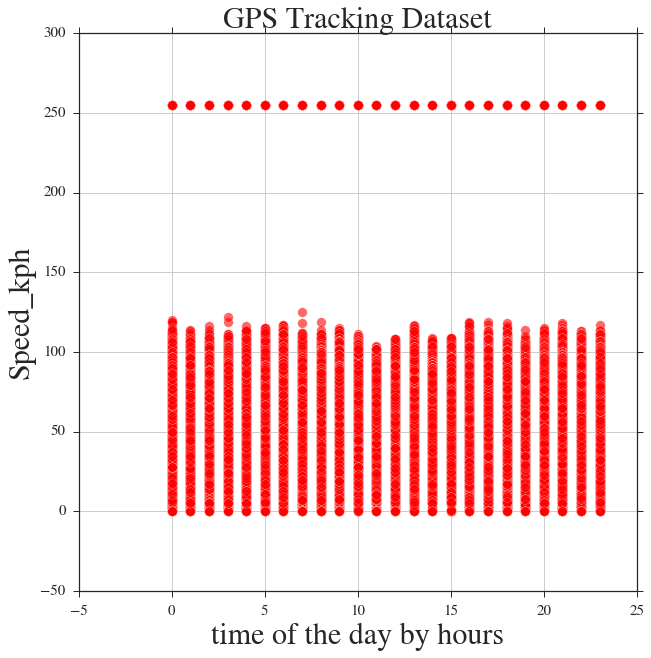

In [78]:
fig, axes = plt.subplots()
fig.set_size_inches(10,10)

axes.grid()
axes.set_xlabel('time of the day by hours',fontsize=30)
axes.set_ylabel('Speed_kph',fontsize=30)
plt.title('GPS Tracking Dataset',fontsize=30)
axes.scatter(df_cluster_2.event_timestamp, df_cluster_2.speed_gps_kph, s=90, alpha=0.6, c='red')

We first need to normalise the data:

In [79]:
minmax_scale = preprocessing.MinMaxScaler().fit(df_cluster_2[['event_timestamp','speed_gps_kph']])
df_cluster_2[['event_timestamp','speed_gps_kph']] = minmax_scale.transform(df_cluster_2[['event_timestamp','speed_gps_kph']])

D:\Program Files\Anaconda\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
D:\Program Files\Anaconda\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


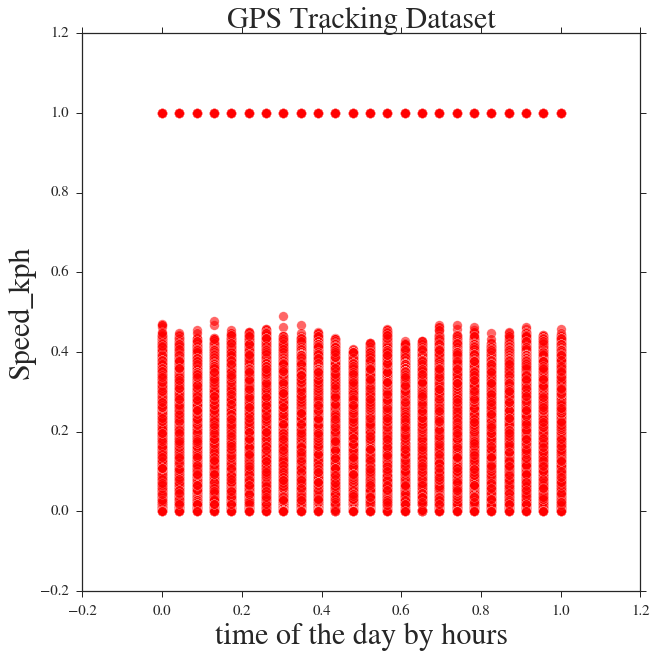

In [80]:
fig, axes = plt.subplots()
fig.set_size_inches(10,10)
axes.set_xlabel('time of the day by hours',fontsize=30)
axes.set_ylabel('Speed_kph',fontsize=30)
plt.title('GPS Tracking Dataset',fontsize=30)
axes.scatter(df_cluster_2.event_timestamp, df_cluster_2.speed_gps_kph, s=90, alpha=0.6, c='red')

Now let's use k-means algorithms to cluster the vehicles into distinct groups with **k=2 (2 natural groups of data)** as a starting point.

In [82]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [83]:
km = KMeans(n_clusters=2, init='random')

In [85]:
df_cluster_2.head()

,event_timestamp,speed_gps_kph,course_over_ground
0,0.7391,0.0118,South
1,0.7826,0.0510,South
2,0.7391,0.0000,South
3,0.7826,0.0667,South
4,0.7391,0.0235,South


In [87]:
df_cluster_2.tail()

,event_timestamp,speed_gps_kph,course_over_ground
569936,0.9565,0.2627,South
569937,0.9130,0.2902,South
569938,0.2174,0.2353,South
569939,0.0870,0.3373,South
569940,0.8696,0.3020,South


In [88]:
km.fit(df_cluster_2[['event_timestamp','speed_gps_kph']].values)

KMeans(copy_x=True, init='random', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [91]:
predictions = km.predict(df_cluster_2[['event_timestamp','speed_gps_kph']].values)
predictions

array([0, 0, 0, ..., 1, 1, 0])

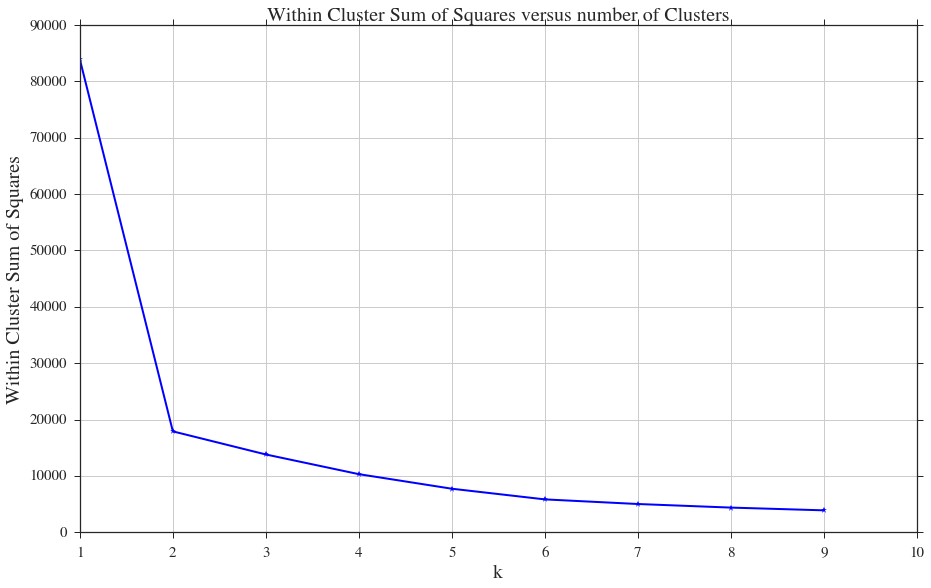

In [93]:
k_rng = range(1,10)
est = [KMeans(n_clusters = k).fit(df_cluster_2[['event_timestamp','speed_gps_kph']].values) for k in k_rng]

# Generally want to minimize WSS, while also minimizing k
within_cluster_sum_squares = [e.inertia_ for e in est]
fig, axes = plt.subplots()
fig.set_size_inches(15,20)
# Plot the results
plt.subplot(212)
plt.plot(k_rng, within_cluster_sum_squares, 'b*-')
plt.xlim([1,10])
plt.grid(True)
plt.xlabel('k', fontsize=20)
plt.ylabel('Within Cluster Sum of Squares', fontsize=20)
plt.title('Within Cluster Sum of Squares versus number of Clusters', fontsize=20)

We generally want to minimize WSS, while also minimizing k. The elbow area on the curve which shows k = 2 as 2 numbers of clusters indicates that **we can cluster the vehicles into 2 disticnt groups most accurately among other number of groups from 1 to 9**. And 2 natural groups of vehicles might be described as **north or south** vehicle according to cluster analysis.

## Discussion Points

Clustering is fun and fascinating but it can also lead you astray and become a waste of time. Obtaining useful results is often difficult. Interpretation is a challenge.

We tend to assume that our dataset has clusters, or a certain number, and this may prove to be wrong assumption.

Assuming you have found clusters and are able to draw out some meaning from them, the field is still lacking rigorous tools to evaluate the findings and even to know exactly what to do with them.

A good starting point with clustering is to formulate the question you are wanting to answer at the outset, together with hypotheses and then use the data to validate or disprove them.

## Key findings

**We can cluster the vehicles into 2 disticnt groups most accurately among other number of groups from 1 to 9**. And 2 natural groups of vehicles might be described as heavy or light vehicle according to cluster analysis. 